In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
!pip install neattext

In [5]:
df = pd.read_csv("emotions2_final.csv")

In [15]:
df.head()

,Text,Label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [11]:
df['Label'].value_counts()

Label
joy             5623
sadness         5011
anger           2159
fear            1937
love            1304
surprise         572
anticipation     250
trust            250
neutral          201
confidence       200
Name: count, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

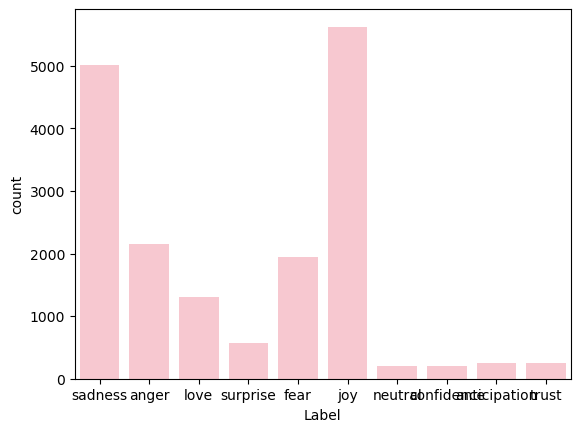

In [13]:
sns.countplot(x='Label',data=df, color="pink")

In [24]:
import neattext.functions as nfx

# Remove the user handles
df['Text'] = df['Text'].apply(nfx.remove_userhandles)

In [26]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [30]:
df.tail(10)

,Text,Label,Clean_Text
17497,I trust my mentor completely.,trust,I trust my mentor completely.
17498,I know I can rely on the guidelines.,trust,I know I can rely on the guidelines.
17499,There is a sense of security when I think of m...,trust,There is a sense of security when I think of m...
17500,I know I can rely on the guidelines.,trust,I know I can rely on the guidelines.
17501,I know I can rely on my friend.,trust,I know I can rely on my friend.
17502,I know the leader will handle things with care.,trust,I know the leader will handle things with care.
17503,I know I can rely on my teacher.,trust,I know I can rely on my teacher.
17504,I believe that our strategy will work out just...,trust,I believe that our strategy will work out just...
17505,I am confident that our strategy will not disa...,trust,I am confident that our strategy will not disa...
17506,I know my teacher will handle things with care.,trust,I know my teacher will handle things with care.


In [32]:
# Remove the stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [38]:
df.head()

,Text,Label,Clean_Text
0,i didnt feel humiliated,sadness,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,feeling hopeless damned hopeful cares awake
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,feeling nostalgic fireplace know property
4,i am feeling grouchy,anger,feeling grouchy


In [40]:
df.tail()

,Text,Label,Clean_Text
17502,I know the leader will handle things with care.,trust,know leader handle things care.
17503,I know I can rely on my teacher.,trust,know rely teacher.
17504,I believe that our strategy will work out just...,trust,believe strategy work fine.
17505,I am confident that our strategy will not disa...,trust,confident strategy disappoint me.
17506,I know my teacher will handle things with care.,trust,know teacher handle things care.


Splitting data into input variables and target variable

In [45]:
x = df['Clean_Text']
y = df['Label']

Splitting data into train and test set

In [48]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

Training the model

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [53]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)


0.8806396344945745

In [54]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc', SVC(kernel = 'rbf', C = 10))])
pipe_svm.fit(x_train,y_train)
pipe_svm.score(x_test,y_test)


0.8534170949933372

In [56]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf', RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

0.8707405292213973

Saving the model

In [58]:
import joblib
pipeline_file = open("text_emotion.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

In [81]:
pipe_lr = joblib.load("text_emotion.pkl")
pipe_lr


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [83]:
def get_prediction(text):
    pred = pipe_lr.predict([text])[0]
    probs = pipe_lr.predict_proba([text])[0]
    classes = pipe_lr.classes_

    proba_df = pd.DataFrame({"emotion": classes, "prob": probs})
    proba_df = proba_df.sort_values("prob", ascending=False).reset_index(drop=True)

    return pred, proba_df


In [95]:
sample = "I am very angry"
pred, proba_df = get_prediction(sample)

print("Input:", sample)
print("Predicted Emotion:", pred)
proba_df


Input: I am very angry
Predicted Emotion: anger


,emotion,prob
0,anger,0.705504
1,sadness,0.086000
2,joy,0.053648
3,fear,0.051181
4,trust,0.034462
5,neutral,0.022865
6,anticipation,0.020489
7,love,0.011324
8,surprise,0.010681
9,confidence,0.003847


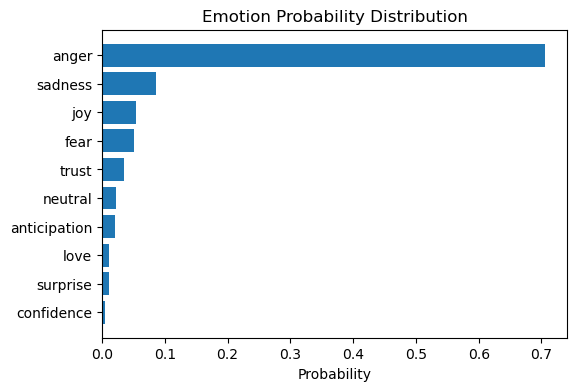

In [97]:
plt.figure(figsize=(6, 4))
plt.barh(proba_df["emotion"], proba_df["prob"])
plt.gca().invert_yaxis()       # Highest probability at the top
plt.xlabel("Probability")
plt.title("Emotion Probability Distribution")
plt.show()


In [98]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

# Create folder for wordclouds
os.makedirs("wordclouds", exist_ok=True)

# Generate wordcloud for each emotion
for emo in df["Label"].unique():
    text_all = " ".join(df[df["Label"] == emo]["Text"].astype(str))
    wc = WordCloud(width=800, height=600, background_color="white").generate(text_all)

    plt.figure(figsize=(8, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(f"wordclouds/{emo}.png", dpi=150)
    plt.close()

print("Wordclouds saved inside /wordclouds folder.")


Wordclouds saved inside /wordclouds folder.


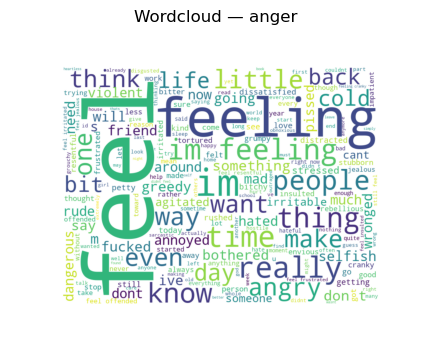

In [99]:
import matplotlib.image as mpimg

wc_path = f"wordclouds/{pred}.png"

if os.path.exists(wc_path):
    img = mpimg.imread(wc_path)
    plt.figure(figsize=(6, 4))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Wordcloud — {pred}")
else:
    print("Wordcloud not found for:", pred)
